In [11]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold


In [12]:

# df_TagDesc = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\CSV\Not for Processing\TagDesc.csv')

df_All_1 = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\1 Preprocess\Merge Data\contData_all_Avg_1o2.csv')
df_All_2 = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\1 Preprocess\Merge Data\contData_all_Avg_2o2.csv')
# Concatenate (union) the dataframes
df_All = pd.concat([df_All_1, df_All_2], ignore_index=True)

print(df_All.head())


   425_pct_Al  M_Value  C4_pct_Eth  C4_pct_H2O  C4_pct_Hex  \
0    6.307630  3.50893    2.508420    21.96340    0.659256   
1    6.308335  3.50863    2.511135    21.96865    0.659930   
2    6.309390  3.50818    2.515210    21.97655    0.660942   
3    6.310090  3.50788    2.517925    21.98185    0.661616   
4    6.310790  3.50758    2.520640    21.98715    0.662291   

   HydWtr_pct_Ammonia  HydWtr_Na2O   DI55152   FC55003       FC55552  \
0            0.908765     2.712180  0.925255  4919.290  41564.100000   
1            0.907643     2.805415  0.924281  5039.445  41558.250000   
2            0.905959     2.945270  0.923773  5268.620  41524.066667   
3            0.904837     3.038505  0.924103  5349.320  41500.275000   
4            0.903715     3.131740  0.924258  5563.165  41466.625000   

       FC55569  FFC55553  FFC55555    LC55555   PI55004   TC55552     TC55555  \
0  6918.110000  0.996975  0.751501  59.968800  1.306310  177.1880  180.125000   
1  6919.960000  0.998847  0.7505

### Include

In [13]:
# selected_columns = ['Butanol', 
#                     'FC55569',
#                     'DI55152',
#                     '425 %Al',
#                     'TC55552',
#                     'FC55003',
#                     'LC55555',
#                     'FFC55553',
#                     'FFC55555',
#                     'TC55555',
#                     'TI55021',
#                     'PI55004',
#                     'FC55552'
#                     ]
# existing_columns = [col for col in selected_columns if col in df_All.columns]
# df_All = df_All[existing_columns]

# print(df_All.head())

In [14]:
# Set max columns to display
pd.set_option('display.max_columns', None)

### Exlcude

In [15]:
# List of columns to exclude to run XGboost feature selection
exclude_columns = [#'Date',
                 'C4_pct_Hex', 'HydWtr_Na2O'
    
    
                   #'FFC55553' ,'LC55555', 'FC55003', 'LC55557', 'FFC55555','LC55553', 
                #    'TI55021', 'TC55555', 'Decanol'
                   
                   ]

# Create a new DataFrame without the excluded columnsd
df_All = df_All.drop(columns=exclude_columns)

In [16]:
df_All.columns

Index(['425_pct_Al', 'M_Value', 'C4_pct_Eth', 'C4_pct_H2O',
       'HydWtr_pct_Ammonia', 'DI55152', 'FC55003', 'FC55552', 'FC55569',
       'FFC55553', 'FFC55555', 'LC55555', 'PI55004', 'TC55552', 'TC55555',
       'TI55021', 'Butanol'],
      dtype='object')

In [17]:
# df_All = df_All[df_All['Date'] > '2020-06-15 00:00:00']

In [18]:
# df_All.drop('Date', axis=1, inplace=True)

In [19]:
print(df_All.describe())

         425_pct_Al       M_Value    C4_pct_Eth    C4_pct_H2O  \
count  54701.000000  54701.000000  54701.000000  54701.000000   
mean       6.112584      3.604726      1.274754     20.756146   
std        0.316017      0.173736      0.677477      2.859486   
min        0.252306      1.461875      0.086948      7.932310   
25%        5.987750      3.506780      0.675285     18.331550   
50%        6.130470      3.595655      1.291115     20.731850   
75%        6.270075      3.696090      1.719630     22.989150   
max        8.020685      5.827565      8.711360     33.731050   

       HydWtr_pct_Ammonia       DI55152       FC55003       FC55552  \
count        54701.000000  54701.000000  54701.000000  54701.000000   
mean             0.969410      0.944165   5946.323971  36128.859598   
std              0.144668      0.042737    794.065219   4270.390546   
min              0.390025      0.815428   2991.532500  18800.350000   
25%              0.877716      0.915431   5446.200000  3499

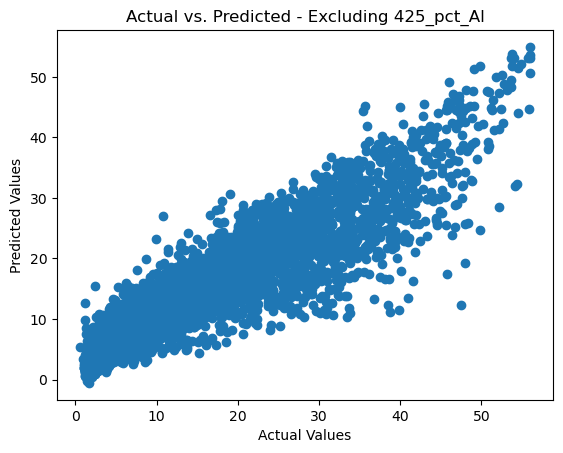

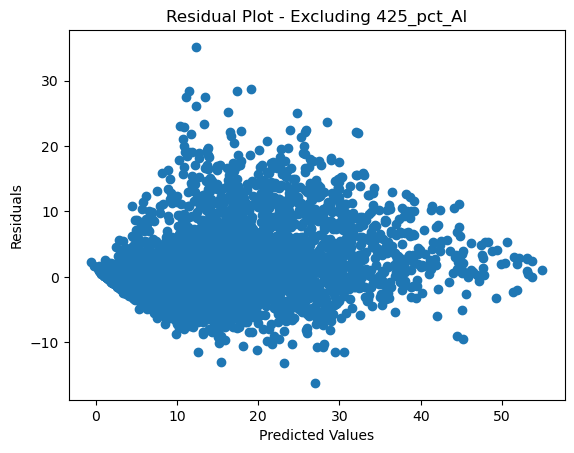

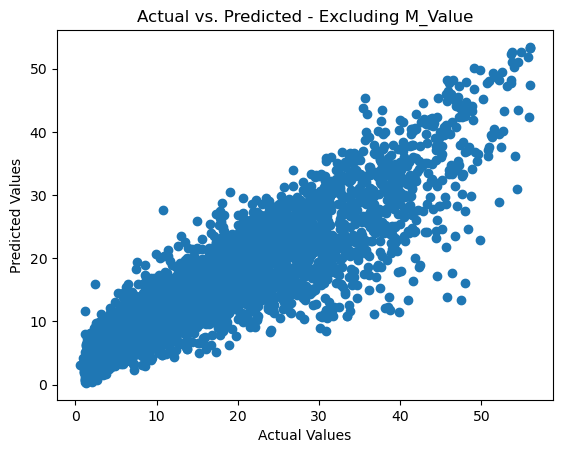

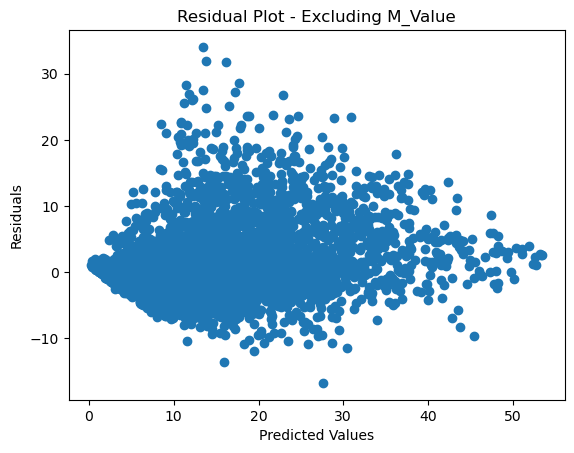

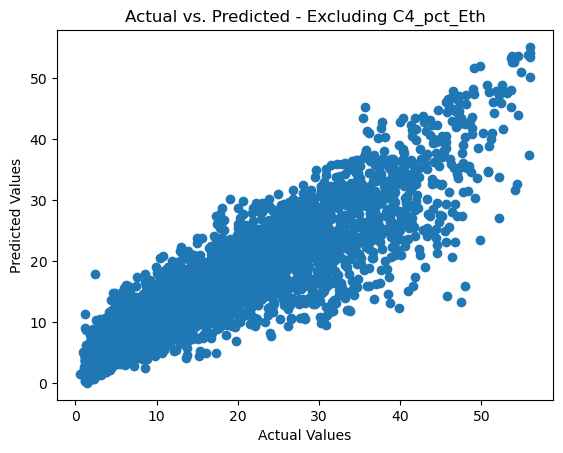

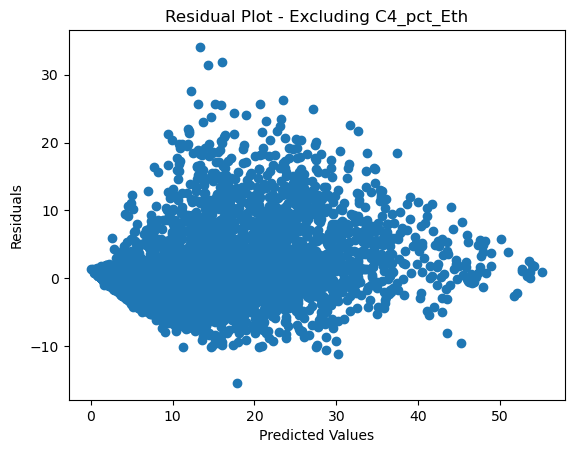

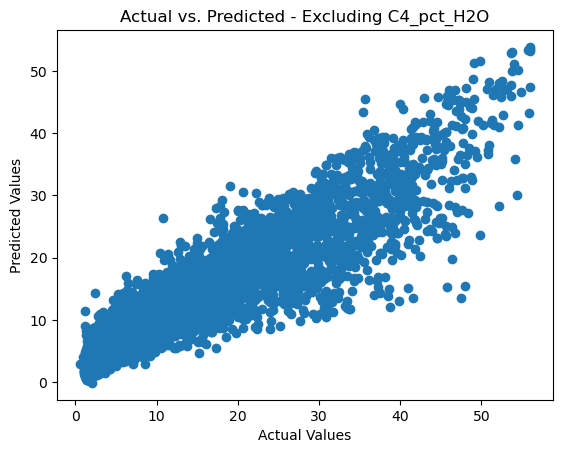

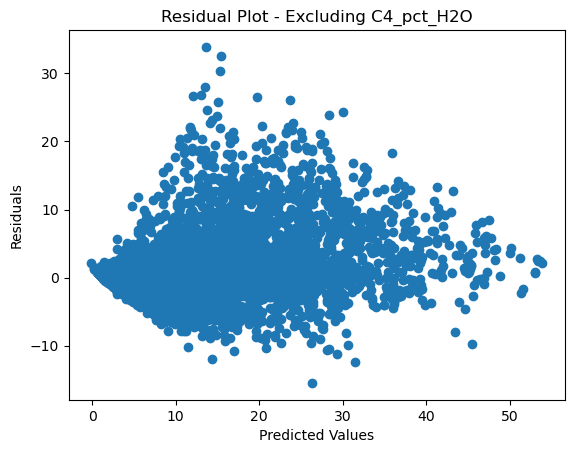

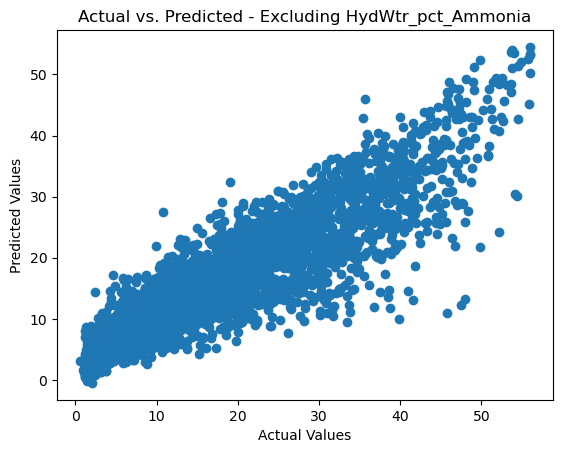

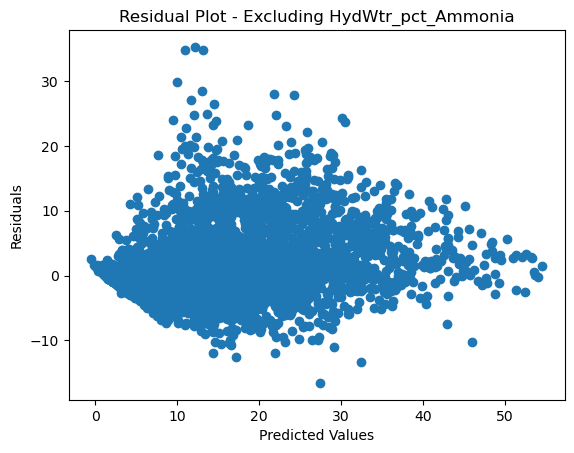

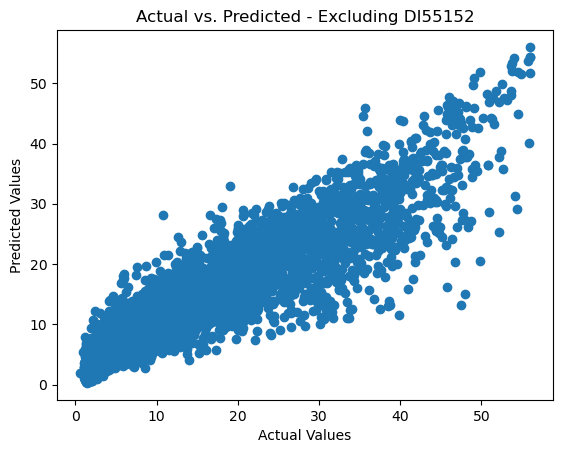

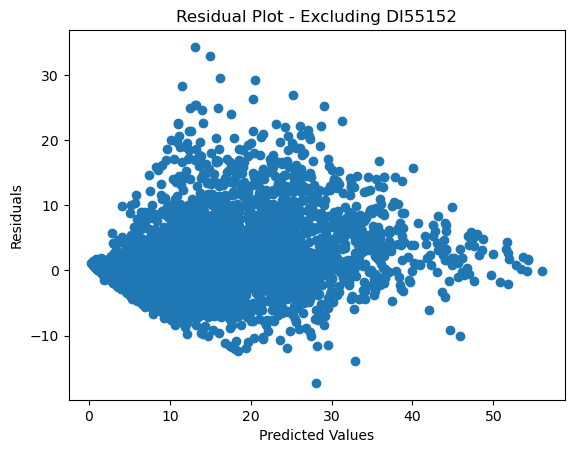

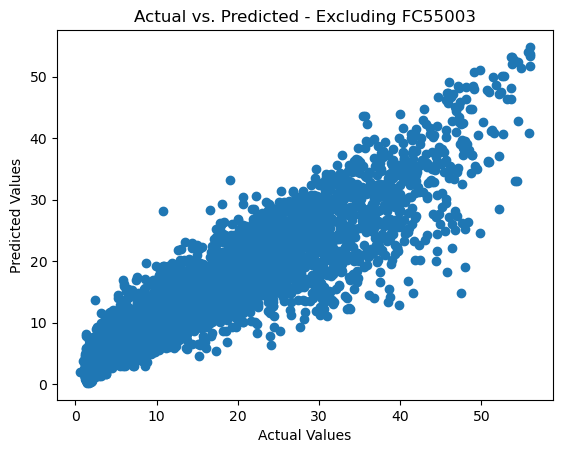

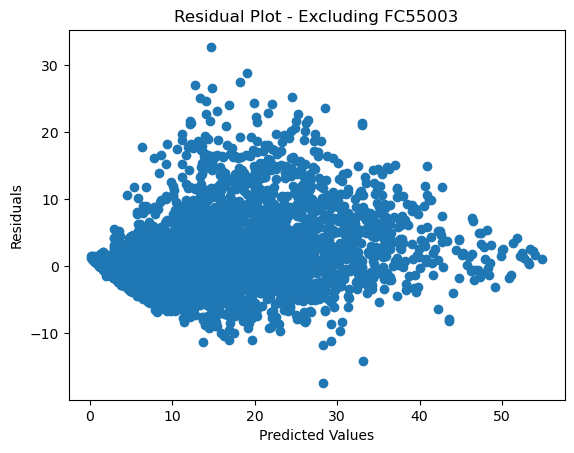

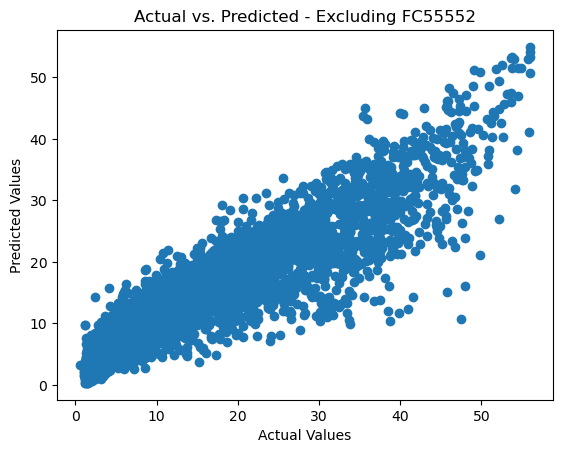

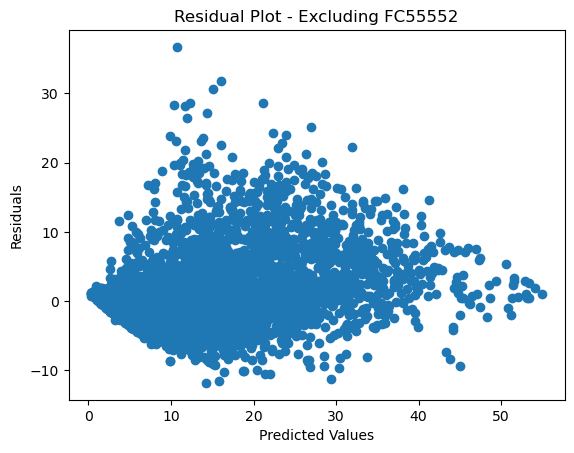

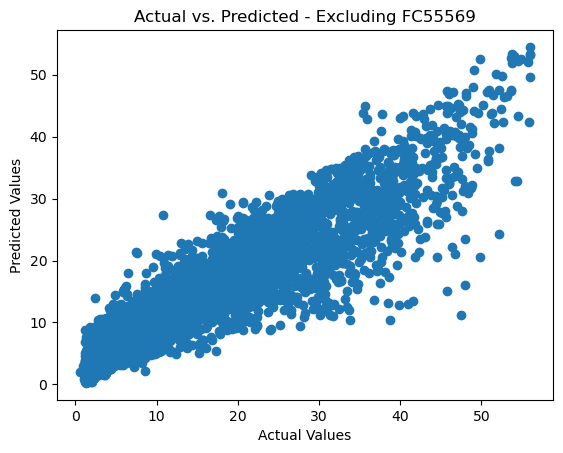

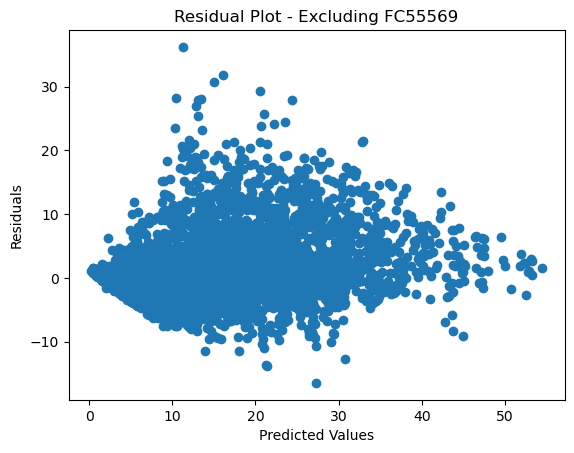

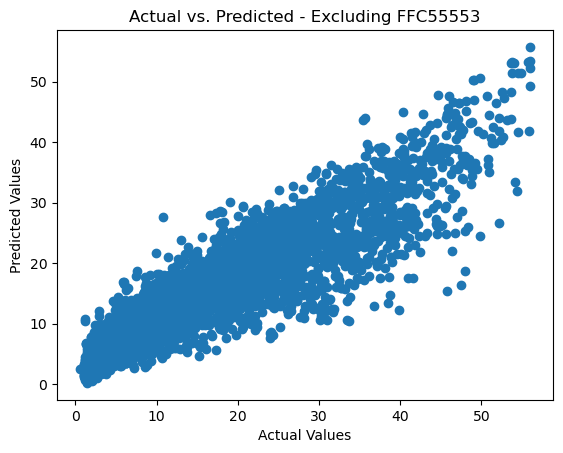

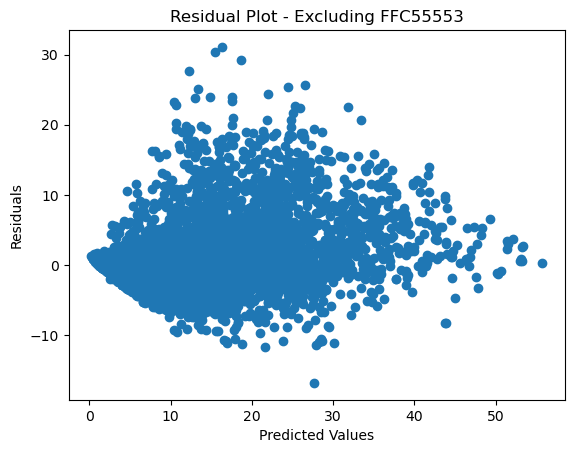

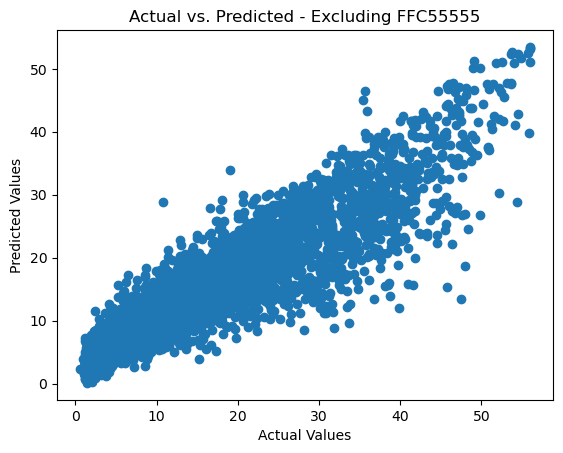

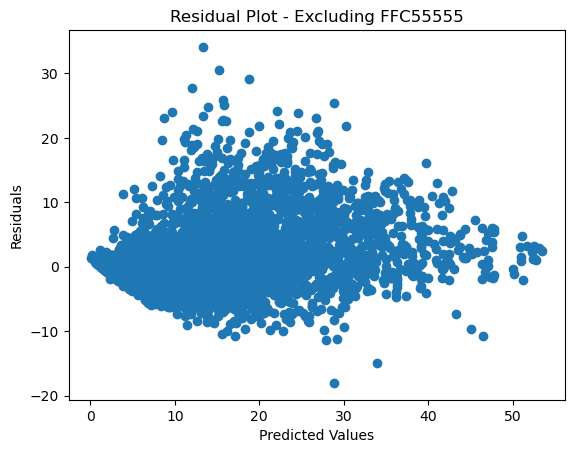

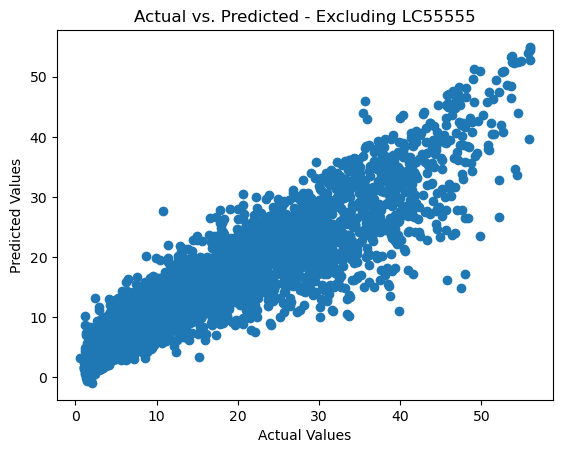

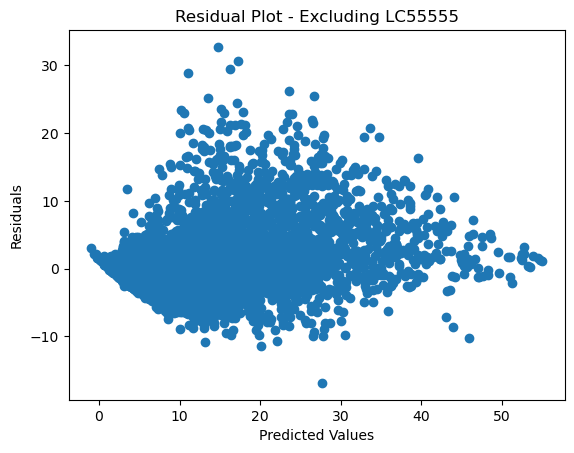

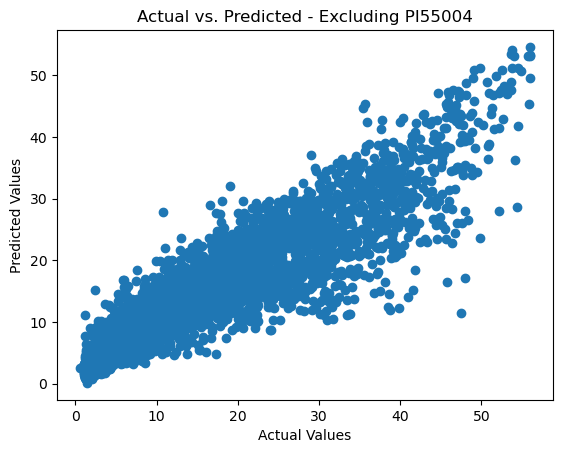

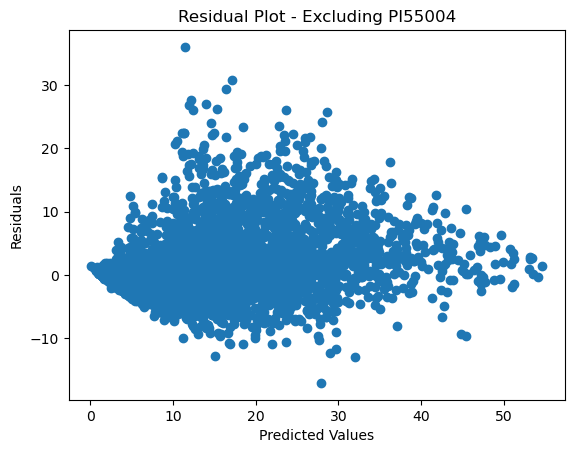

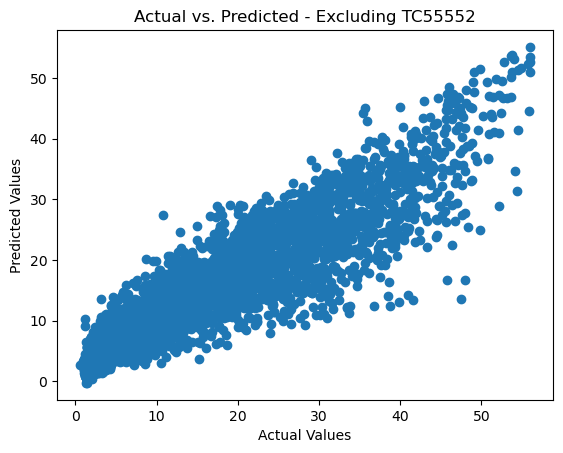

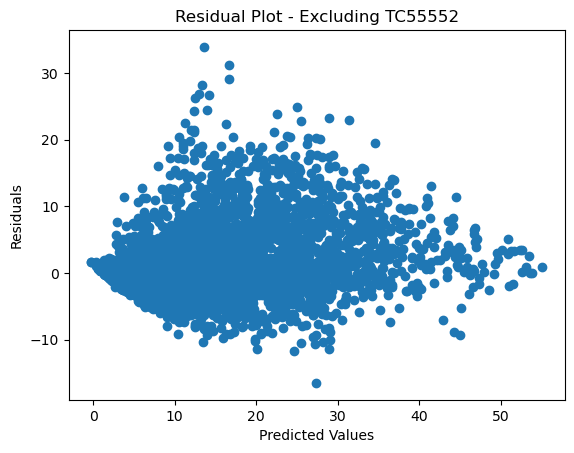

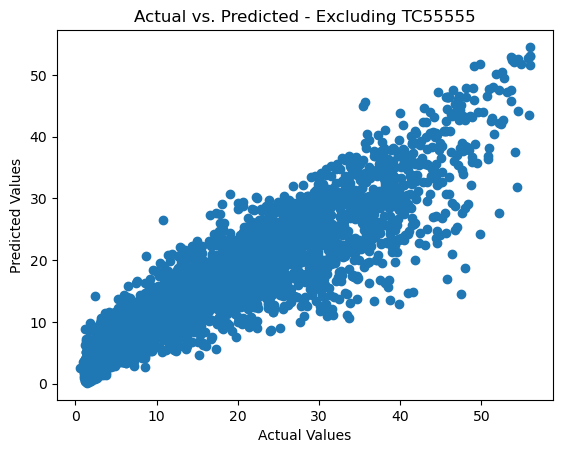

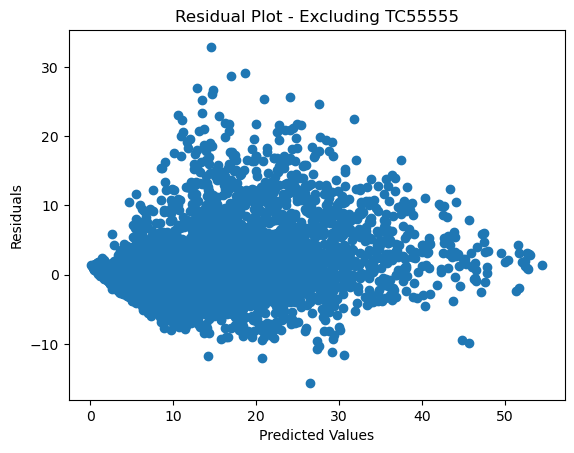

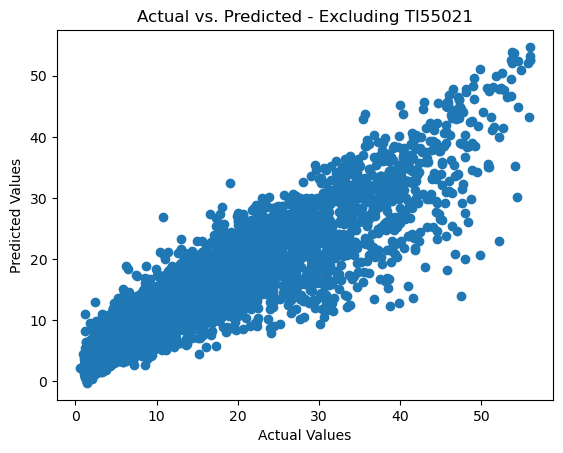

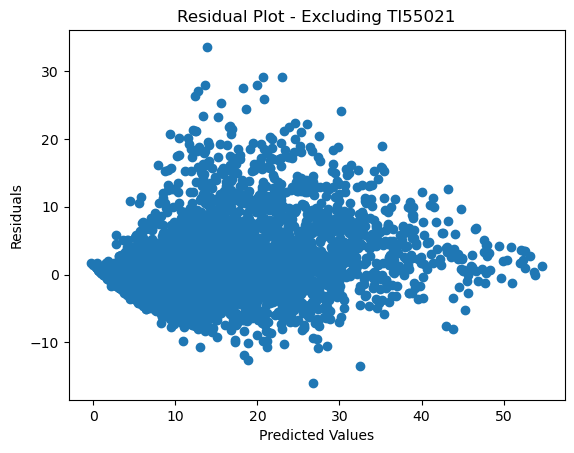

Feature Excluded: 425_pct_Al
MSE Train: 8.194957025544861
RMSE Train: 2.862683535695984
R2 Train: 0.9057091646388266
MSE Test: 12.712957503555268
RMSE Test: 3.5655234543549517
R2 Test: 0.8619996855524797


Feature Excluded: M_Value
MSE Train: 8.890303712064485
RMSE Train: 2.981661233618683
R2 Train: 0.8977085345277492
MSE Test: 13.54239212727059
RMSE Test: 3.6799989303355227
R2 Test: 0.8529960969811843


Feature Excluded: C4_pct_Eth
MSE Train: 8.736600065035251
RMSE Train: 2.955774021307321
R2 Train: 0.8994770423101902
MSE Test: 13.386070457929593
RMSE Test: 3.658697918376098
R2 Test: 0.854692982974706


Feature Excluded: C4_pct_H2O
MSE Train: 8.72411236643264
RMSE Train: 2.9536608414698935
R2 Train: 0.8996207252519443
MSE Test: 13.329427720933763
RMSE Test: 3.650948879528959
R2 Test: 0.8553078450565156


Feature Excluded: HydWtr_pct_Ammonia
MSE Train: 8.666058626788141
RMSE Train: 2.943817016526017
R2 Train: 0.9002886891704684
MSE Test: 13.097237783079478
RMSE Test: 3.6190106083126476

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

def feature_iteration_model(df, target_column_name, plot_results=False):
    original_features = df.drop(target_column_name, axis=1).columns
    model_performance = {}

    for feature in original_features:
        X = df.drop([target_column_name, feature], axis=1)
        y = df[target_column_name]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        xgb_model = xgb.XGBRegressor(
            objective ='reg:squarederror', 
            learning_rate=0.03,
            n_estimators=600,
            max_depth=7,
            subsample=0.9,
            colsample_bytree=0.8,
            gamma=2.0,
            alpha=0.2,
            reg_lambda=2,
            colsample_bylevel=0.8,
            colsample_bynode=0.7
        )
        xgb_model.fit(X_train, y_train)

        # Predict and evaluate on training data
        y_train_pred = xgb_model.predict(X_train)
        mse_train = mean_squared_error(y_train, y_train_pred)
        rmse_train = np.sqrt(mse_train)
        r2_train = r2_score(y_train, y_train_pred)

        # Predict and evaluate on test data
        y_pred = xgb_model.predict(X_test)
        mse_test = mean_squared_error(y_test, y_pred)
        rmse_test = np.sqrt(mse_test)
        r2_test = r2_score(y_test, y_pred)

        # Store the metrics
        model_performance[feature] = {
            'MSE Train': mse_train,
            'RMSE Train': rmse_train,
            'R2 Train': r2_train,
            'MSE Test': mse_test,
            'RMSE Test': rmse_test,
            'R2 Test': r2_test
        }

        # Plotting (optional)
        if plot_results:
            plt.scatter(y_test, y_pred)
            plt.xlabel('Actual Values')
            plt.ylabel('Predicted Values')
            plt.title(f'Actual vs. Predicted - Excluding {feature}')
            plt.show()

            residuals = y_test - y_pred
            plt.scatter(y_pred, residuals)
            plt.xlabel('Predicted Values')
            plt.ylabel('Residuals')
            plt.title(f'Residual Plot - Excluding {feature}')
            plt.show()

    return model_performance

# Assuming your data is in df_All and you want to predict 'Butanol'
performance_without_each_feature = feature_iteration_model(df_All, 'Butanol', plot_results=True)

# Print or analyze the performance dictionary
for feature, metrics in performance_without_each_feature.items():
    print(f"Feature Excluded: {feature}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")
